In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

import pickle
import json

In [10]:
df = pd.read_csv("fashion_products.csv")
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


## Preprocessing & Feature Engg

#### 3. Product Name

In [12]:
df['Product Name'].value_counts().to_dict()

{'Jeans': 231, 'Shoes': 222, 'T-shirt': 201, 'Dress': 176, 'Sweater': 170}

In [15]:
df.replace({'Jeans': 2, 'Shoes': 3, 'T-shirt': 1, 'Dress': 5, 'Sweater': 4}, inplace=True)
df.columns = ['User ID', 'Product ID', 'product_name', 'brand', 'category', 'price',
       'rating', 'color', 'size']
df.head()

,User ID,Product ID,product_name,brand,category,price,rating,color,size
0,19,1,5,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,3,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,5,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,3,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,1,Adidas,Men's Fashion,79,4.302773,Black,M


#### 4.Brand

In [18]:
df['brand'].value_counts().to_dict()

{'Nike': 214, 'Zara': 203, 'Adidas': 198, 'H&M': 194, 'Gucci': 191}

In [19]:
df['brand'].replace({'Nike': 3, 'Zara': 2, 'Adidas': 4, 'H&M': 1, 'Gucci': 5}, inplace=True)
df['brand']

0      4
1      1
2      4
3      2
4      4
      ..
995    2
996    3
997    2
998    2
999    4
Name: brand, Length: 1000, dtype: int64

#### 5. Category

In [21]:
df['category'].value_counts().to_dict()

{"Kids' Fashion": 351, "Women's Fashion": 327, "Men's Fashion": 322}

In [22]:
df['category'].replace({"Kids' Fashion": 1, "Women's Fashion": 4, "Men's Fashion": 3}, inplace=True)
df['category']

0      3
1      4
2      4
3      3
4      3
      ..
995    4
996    1
997    3
998    4
999    4
Name: category, Length: 1000, dtype: int64

#### 8. Color

In [23]:
df['color'].value_counts()

White     193
Yellow    175
Blue      172
Green     156
Black     154
Red       150
Name: color, dtype: int64

In [24]:
df = pd.get_dummies(df, columns=['color'])
df

,User ID,Product ID,product_name,brand,category,price,rating,size,color_Black,color_Blue,color_Green,color_Red,color_White,color_Yellow
0,19,1,5,4,3,40,1.043159,XL,1,0,0,0,0,0
1,97,2,3,1,4,82,4.026416,L,1,0,0,0,0,0
2,25,3,5,4,4,44,3.337938,XL,0,0,0,0,0,1
3,57,4,3,2,3,23,1.049523,S,0,0,0,0,1,0
4,79,5,1,4,3,79,4.302773,M,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20,996,3,2,4,55,1.620081,M,1,0,0,0,0,0
996,42,997,4,3,1,13,1.544464,L,0,0,1,0,0,0
997,9,998,4,2,3,47,3.961913,L,0,0,0,0,1,0
998,8,999,1,2,4,68,3.089722,S,0,1,0,0,0,0


#### 9. Size

In [25]:
df['size'].value_counts().to_dict()

{'XL': 254, 'L': 251, 'S': 249, 'M': 246}

In [27]:
df['size'].replace({'XL': 4, 'L': 3, 'S': 1, 'M': 2}, inplace=True)
df['size']

0      4
1      3
2      4
3      1
4      2
      ..
995    2
996    3
997    3
998    1
999    3
Name: size, Length: 1000, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   product_name  1000 non-null   int64  
 3   brand         1000 non-null   int64  
 4   category      1000 non-null   int64  
 5   price         1000 non-null   int64  
 6   rating        1000 non-null   float64
 7   size          1000 non-null   int64  
 8   color_Black   1000 non-null   uint8  
 9   color_Blue    1000 non-null   uint8  
 10  color_Green   1000 non-null   uint8  
 11  color_Red     1000 non-null   uint8  
 12  color_White   1000 non-null   uint8  
 13  color_Yellow  1000 non-null   uint8  
dtypes: float64(1), int64(7), uint8(6)
memory usage: 68.5 KB


## Feature Selection

### Linearity

In [29]:
df.corr().loc[:,'price']

User ID         0.003363
Product ID      0.034602
product_name   -0.045063
brand          -0.029128
category       -0.002584
price           1.000000
rating          0.033927
size            0.056050
color_Black     0.015509
color_Blue     -0.027329
color_Green     0.012432
color_Red       0.005355
color_White     0.009112
color_Yellow   -0.013958
Name: price, dtype: float64

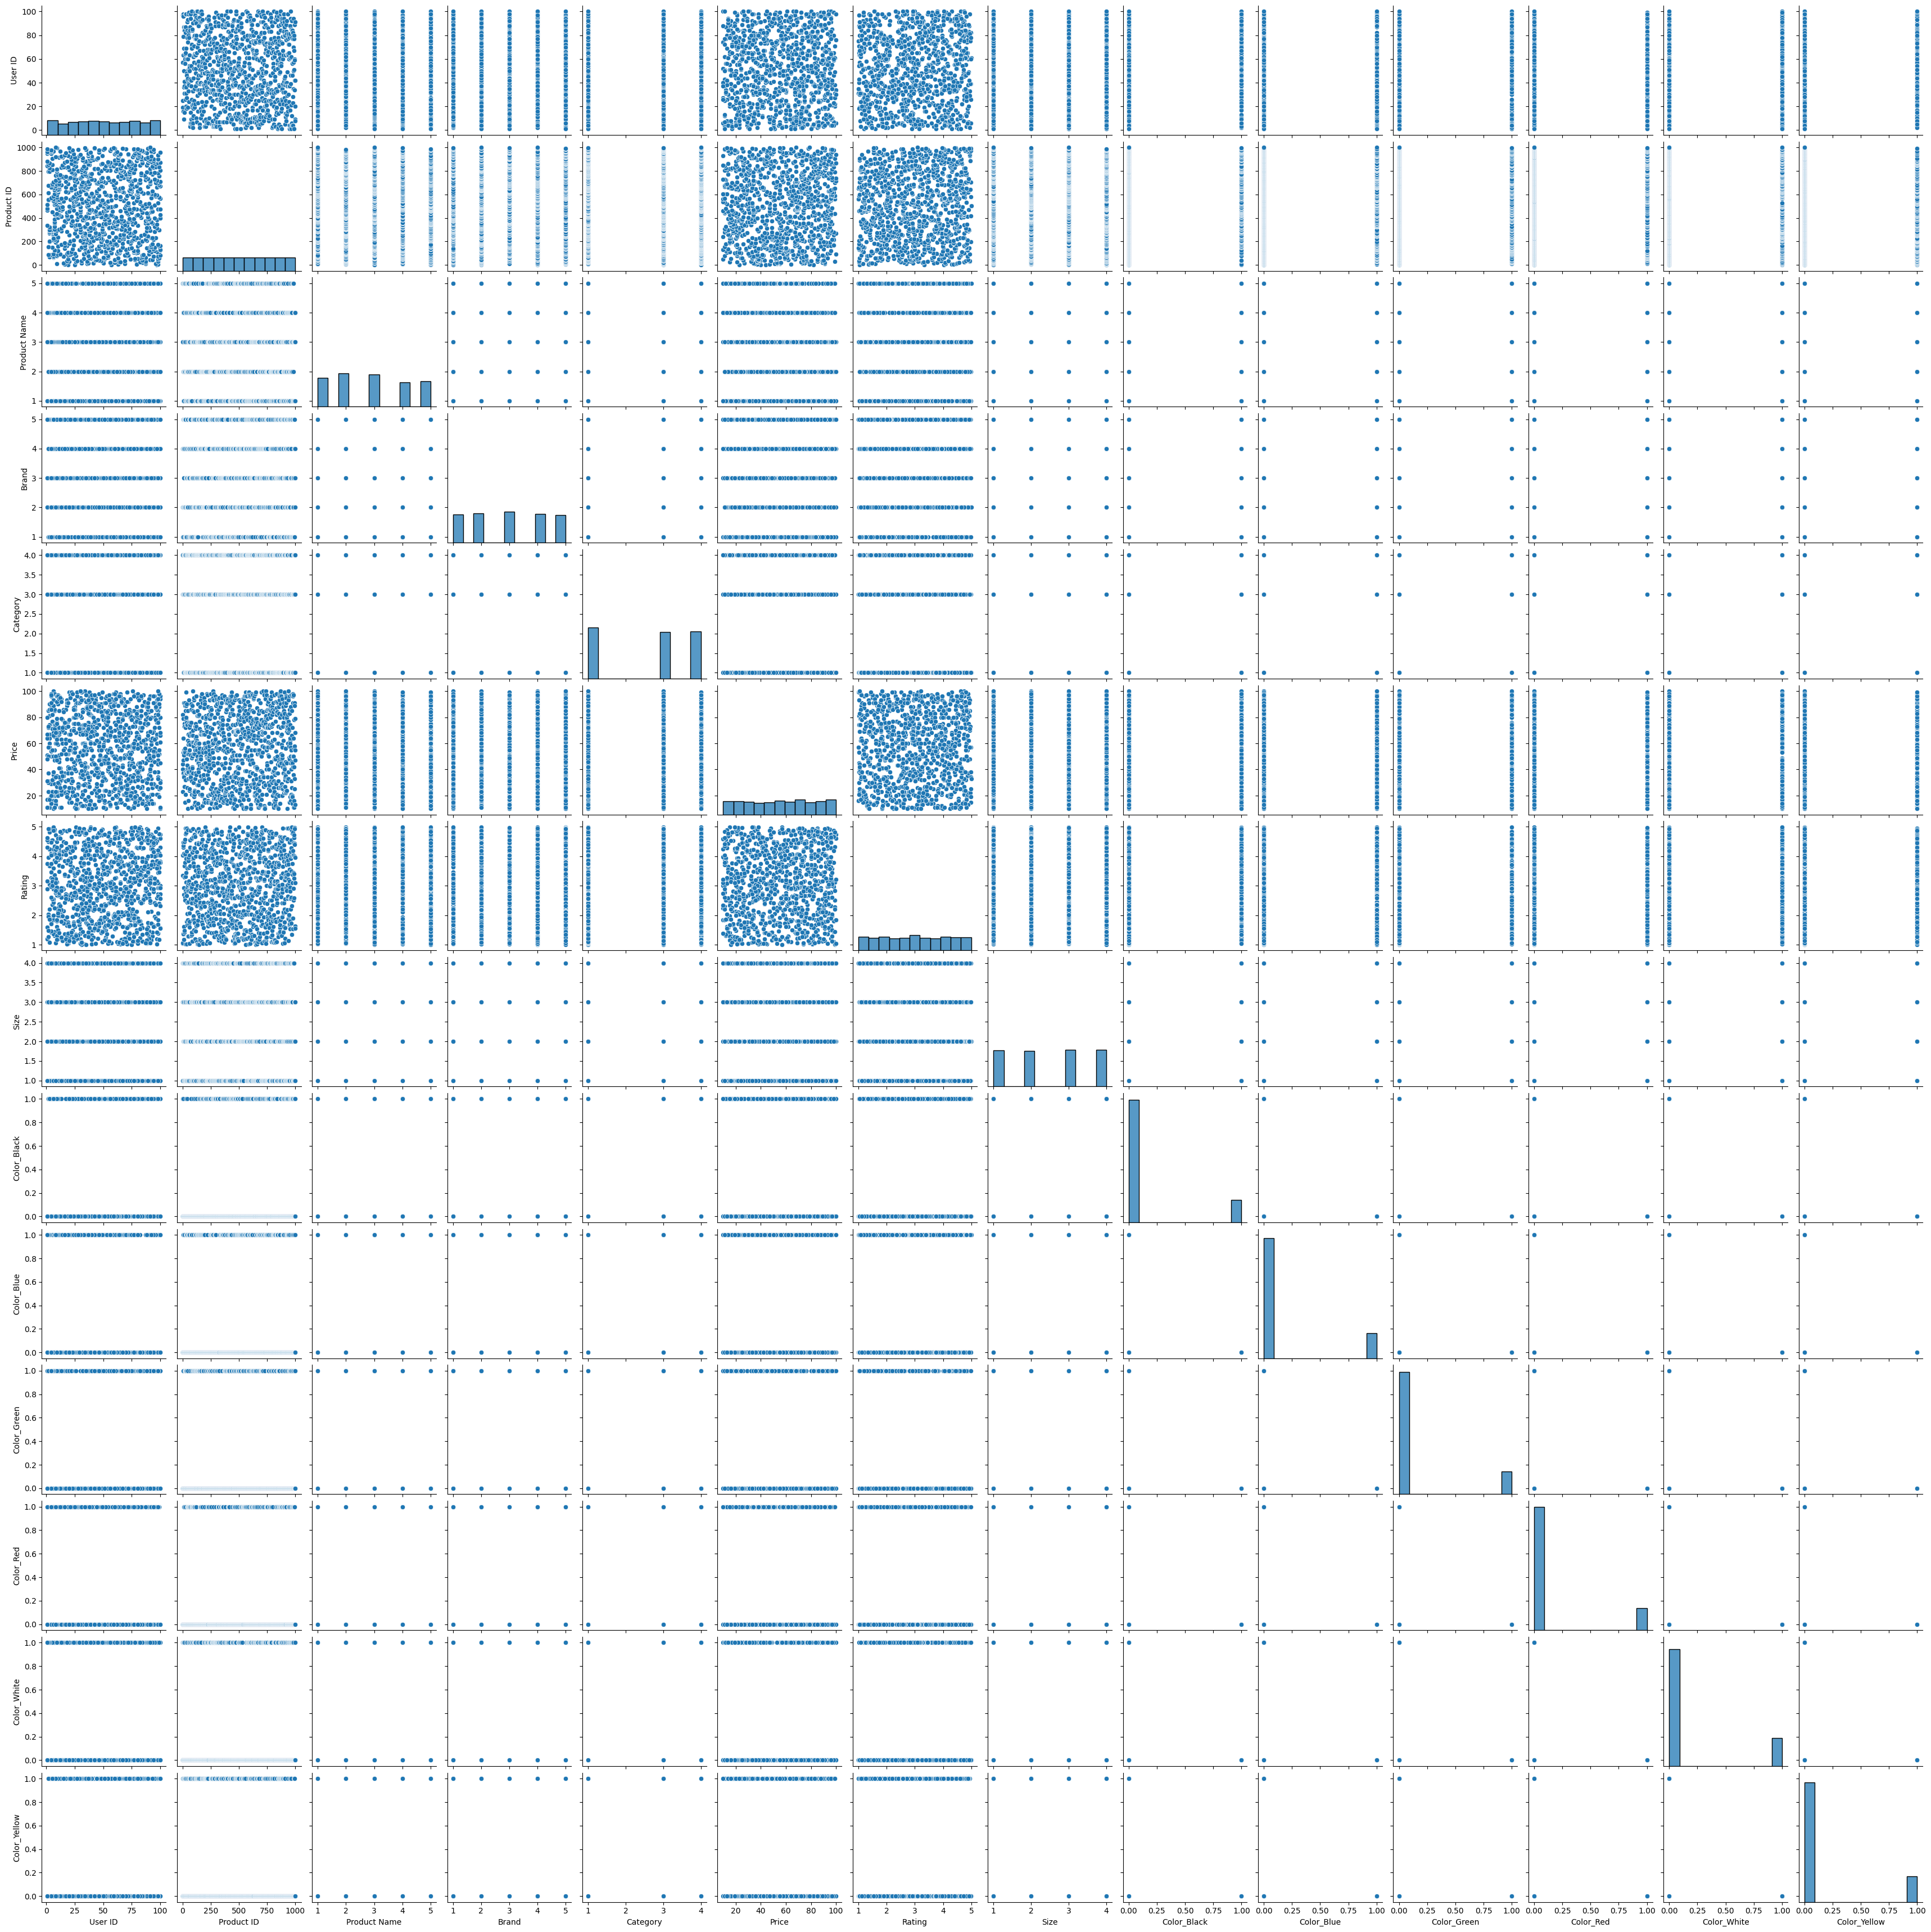

In [39]:
sns.pairplot(df)
plt.savefig('pairplot.jpeg')

In [30]:
df.drop(['User ID','Product ID'],axis=1, inplace=True)

In [31]:
df

,product_name,brand,category,price,rating,size,color_Black,color_Blue,color_Green,color_Red,color_White,color_Yellow
0,5,4,3,40,1.043159,4,1,0,0,0,0,0
1,3,1,4,82,4.026416,3,1,0,0,0,0,0
2,5,4,4,44,3.337938,4,0,0,0,0,0,1
3,3,2,3,23,1.049523,1,0,0,0,0,1,0
4,1,4,3,79,4.302773,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,4,55,1.620081,2,1,0,0,0,0,0
996,4,3,1,13,1.544464,3,0,0,1,0,0,0
997,4,2,3,47,3.961913,3,0,0,0,0,1,0
998,1,2,4,68,3.089722,1,0,1,0,0,0,0


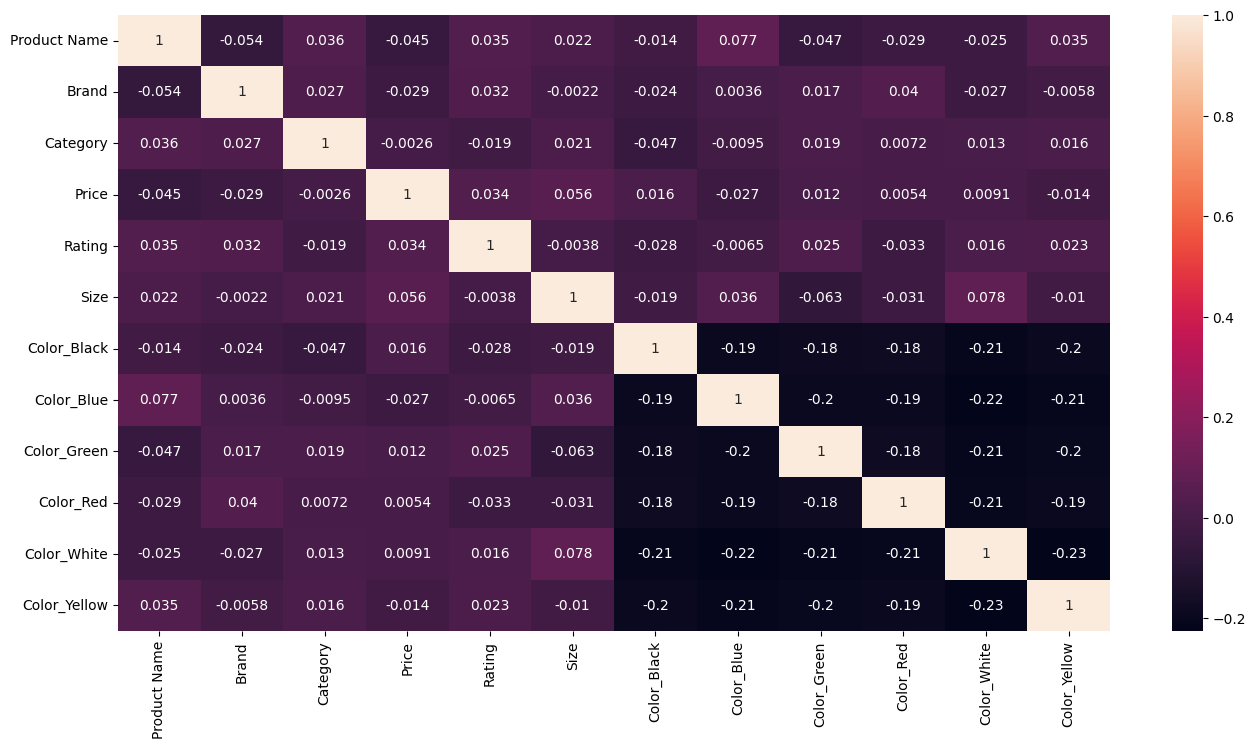

In [49]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)
plt.savefig('heatmap.jpeg')

## No Multicolinearity

In [32]:
x= df.drop('price', axis=1)
x

,product_name,brand,category,rating,size,color_Black,color_Blue,color_Green,color_Red,color_White,color_Yellow
0,5,4,3,1.043159,4,1,0,0,0,0,0
1,3,1,4,4.026416,3,1,0,0,0,0,0
2,5,4,4,3.337938,4,0,0,0,0,0,1
3,3,2,3,1.049523,1,0,0,0,0,1,0
4,1,4,3,4.302773,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,4,1.620081,2,1,0,0,0,0,0
996,4,3,1,1.544464,3,0,0,1,0,0,0
997,4,2,3,3.961913,3,0,0,0,0,1,0
998,1,2,4,3.089722,1,0,1,0,0,0,0


In [33]:
y=df['price']
y

0      40
1      82
2      44
3      23
4      79
       ..
995    55
996    13
997    47
998    68
999    79
Name: price, Length: 1000, dtype: int64

In [34]:
vif_list =[]
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x,i)
    vif_list.append(vif)
vif_list

[1.015462590364753,
 1.0076241464342959,
 1.0056642752099603,
 1.005853548313827,
 1.0114296764987711,
 4.5473164554906065,
 5.350881050390172,
 4.733172257781224,
 4.575128867791684,
 5.806900113517045,
 5.358612809547605]

In [35]:
vif_data = pd.Series(vif_list, index = x.columns)
vif_data

product_name    1.015463
brand           1.007624
category        1.005664
rating          1.005854
size            1.011430
color_Black     4.547316
color_Blue      5.350881
color_Green     4.733172
color_Red       4.575129
color_White     5.806900
color_Yellow    5.358613
dtype: float64

## Model Training

### Train Test Split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred = lin_reg.predict(x_test)
y_pred[1:6]

array([54.74961335, 57.03850249, 57.04421298, 57.28124549, 54.74306551])

### Evaluaion of Testing

In [38]:
y_pred = lin_reg.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value         :",r2_value)

Root Mean Squared Error : 24.382082614491917
Mean Absolute Error     : 20.80520546368969
R-Squared Value         : 0.015304993925582044


### Evaluaion of Training

In [39]:
y_pred_train = lin_reg.predict(x_train)


mse = mean_squared_error(y_train, y_pred_train)
# print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value         :",r2_value)

Root Mean Squared Error : 26.60506352061776
Mean Absolute Error     : 23.139732337869308
R-Squared Value         : 0.005335762787484932


### Single Row testing

In [40]:
df[3:4]

,product_name,brand,category,price,rating,size,color_Black,color_Blue,color_Green,color_Red,color_White,color_Yellow
3,3,2,3,23,1.049523,1,0,0,0,0,1,0


In [41]:
product_name ='Jeans'
brand = 'Zara'
category = "Men's Fashion"
rating = 1.049523
size = 'S'
color = 'White'


##### For Label Encoded Fefatures

In [42]:
product_name_labels = {'Jeans': 2, 'Shoes': 3, 'T-shirt': 1, 'Dress': 5, 'Sweater': 4}
brand_labels = {'Nike': 3, 'Zara': 2, 'Adidas': 4, 'H&M': 1, 'Gucci': 5}
category_labels = {"Kids' Fashion": 1, "Women's Fashion": 4, "Men's Fashion": 3}
size_labels = {'XL': 4, 'L': 3, 'S': 1, 'M': 2}

In [43]:
product_name = product_name_labels[product_name]
brand = brand_labels[brand]
category = category_labels[category]
size = size_labels[size]

In [44]:
test_array = np.zeros((1, lin_reg.n_features_in_))
test_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [45]:
test_array[0,0] = product_name
test_array[0,1] = brand
test_array[0,2] = category
test_array[0,3] = rating
test_array[0,4] = size

##### For One Hot Encoded Fefatures

In [46]:
color = 'color_' + color
color

'color_White'

In [47]:
color_index = x.columns.to_list().index(color)
color_index

9

In [48]:
test_array[0,color_index] = 1

In [49]:
predicted_charges = np.around(lin_reg.predict(test_array)[0],3)
predicted_charges

54.745

In [50]:
with open ('fashion_product.pkl', 'wb') as f:
    pickle.dump(lin_reg,f)

In [51]:
project_data = {"Product_Name": product_name_labels,
               "Brand":brand_labels,
                "Category":category_labels,
                "Size":size_labels,
               "Column_Names" : x.columns.to_list()}


with open ('Json_Data.json', "w") as f:
    json.dump(project_data,f)